# Project : Zomato API Question-1

Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
from collections import Counter

In [3]:
data = pd.read_csv('/Users/atharvjairath/Downloads/zomato.csv',encoding="latin-1")

In [5]:
data_india= data[data['Country Code']==1]
Total_city_count,Delhi_NCR = countrestaurent(data_india) #function _call to count restaurent
Rest_res=Total_city_count- Delhi_NCR #Rest of india restaurent count
li=[Delhi_NCR,Rest_res]
li_1=['Delhi_NCR','Rest_of_India'] 

In [4]:
def countrestaurent(data):
    # DELHI-NCR Cities
    rest_data1 = data_india[data_india['City']=='New Delhi']
    rest_data2 = data_india[data_india['City']=='Ghaziabad'] 
    rest_data3= data_india[data_india['City']=='Noida'] 
    rest_data4= data_india[data_india['City']=='Gurgaon'] 
    rest_data5= data_india[data_india['City']=='Faridabad'] 
    # Delhi NCR city Calculations
    rest_count = rest_data1['City'].count() + rest_data2['City'].count() + rest_data3['City'].count() + rest_data4['City'].count() + rest_data5['City'].count()
    total_city_count = data_india['City'].count() # total number of indian city in data
    return total_city_count,rest_count
 

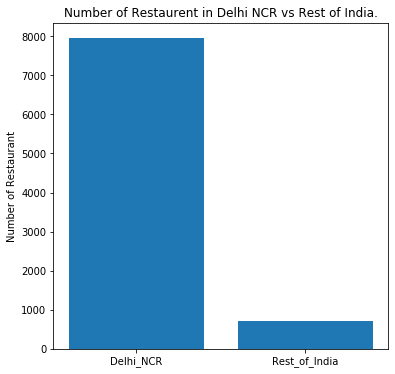

In [6]:
# Graph Plot
plt.subplots(figsize=(6,6))
plt.title('Number of Restaurent in Delhi NCR vs Rest of India.') 
plt.ylabel("Number of Restaurant") 
plt.bar(li_1,li)
plt.show() 

2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [7]:

total_cuisines=[]
for ele in data_india['Cuisines']:
    p=ele.split(",") #split the cuisienes on the basis of "," .
    for i in range(len(p)):
        p[i]=p[i].strip() # removed extra space from list element.
    total_cuisines+=p   # calculations of all cuisines serve in all india.

total_cuisines = set(total_cuisines) # convert in set to remove duplicate value of cuisine

delhi_ncr_cuisines=[]

l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi_NCR city
for i in l:
    p=data_india[data_india.City==i]
    for ele in p['Cuisines']:
        s=ele.split(",")      #split the cuisienes on the basis of "," .
        for i in range(len(s)):
            s[i]=s[i].strip()  # removed extra space from list element.
        delhi_ncr_cuisines+=s # calculations of all cuisines serve in DELHI-NCR.
        
delhi_ncr_cuisines = set(delhi_ncr_cuisines) # convert in set to remove duplicate value of cuisine

cuisines_not_in_Delhi=total_cuisines.difference(delhi_ncr_cuisines) # set Difference of total_cuisines and delhi_ncr_cuisines will give cuisines,
print("CUISINES THAT ARE NOT SERVED USING IN DELHI_NCR USING zomato.csv:")                                                # that not served in DELHI-NCR
for e in cuisines_not_in_Delhi:
    print(e)   ## Cuisine not present in Delhi NCR but present in rest of india
print("************************************************")  


CUISINES THAT ARE NOT SERVED USING IN DELHI_NCR USING zomato.csv:
BBQ
Cajun
Malwani
German
************************************************


In [8]:
# list of cuisines actually present in Delhi NCR using Zomato API.
import requests 
import json 

h = {'user-key' : '3b329b7e62d61368d1f579defae896ea'} 
p={'q':'delhi'} 
r = requests.get('https://developers.zomato.com/api/v2.1/cities', headers = h,params=p)
p=r.json()
city=p['location_suggestions'] ion 
for ele in city:
    city_id=ele['id'] #finding the id of the city.
    break
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = h,params={'city_id':city_id})  
response=response.json()
cuisines_name_with_id={}
for i in response['cuisines']:
    cuisines_name_with_id[i['cuisine'].get('cuisine_name')]=i['cuisine'].get('cuisine_id') #making dictionary of key as cusines name and value as id
print("CUISINES THAT ARE NOT SERVED IN DELHI_NCR USING ZOMATO API:")
for ele in cuisines_not_in_Delhi:
    if ele not in cuisines_name_with_id:
        print(ele)

CUISINES THAT ARE NOT SERVED IN DELHI_NCR USING ZOMATO API:
Cajun
German


Hence Dataset is Incomplete.

3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [9]:

total_cuisines=[]
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi_NCR city
for (ele, e) in zip(data_india['Cuisines'],data_india['City']): 
    if e.strip() not in l: # city that not in ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad ']
        p=ele.split(",")   
        for i in range(len(p)):
            p[i]=p[i].strip()  
        total_cuisines+=p      # calculations of all cuisines serve in all india.
    
delhi_ncr_cuisines=[]

l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] 
for i in l:
    p=data_india[data_india.City==i]
    for ele in p['Cuisines']:
        s=ele.split(",")      
        for i in range(len(s)):
            s[i]=s[i].strip()  
        delhi_ncr_cuisines+=s # calculations of all cuisines serve in DELHI-NCR.

In [14]:
p1=Counter(total_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants        
p2=Counter(delhi_ncr_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants 
x_Delhi_ncr=[]
y_Delhi_ncr=[]
x_rest_india=[]
y_rest_india=[]
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p1:
    x_rest_india.append(ele[0])
    y_rest_india.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
print()    
print()    
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p2:
    x_Delhi_ncr.append(ele[0])
    y_Delhi_ncr.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))

TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |        349
Chinese         |        242
Continental     |        177
Italian         |        147
Cafe            |        136
Fast Food       |         97
South Indian    |         62
Mughlai         |         59
Desserts        |         55
Mexican         |         50


TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |       3597
Chinese         |       2448
Fast Food       |       1866
Mughlai         |        933
Bakery          |        697
South Indian    |        569
Continental     |        547
Desserts        |        542
Street Food     |        538
Italian         |        535


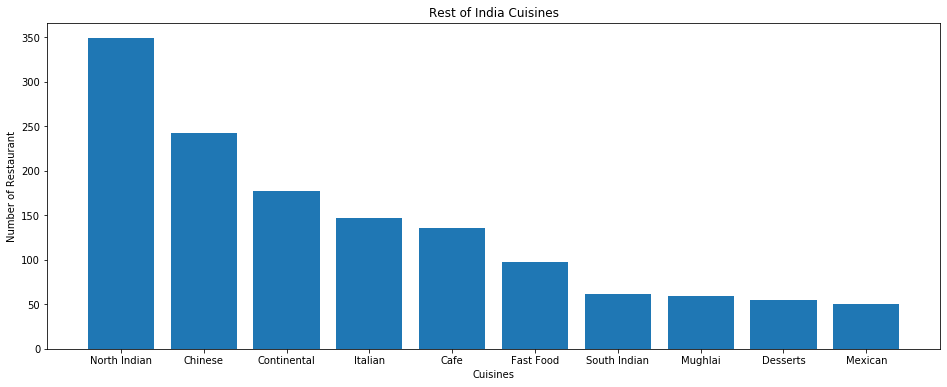

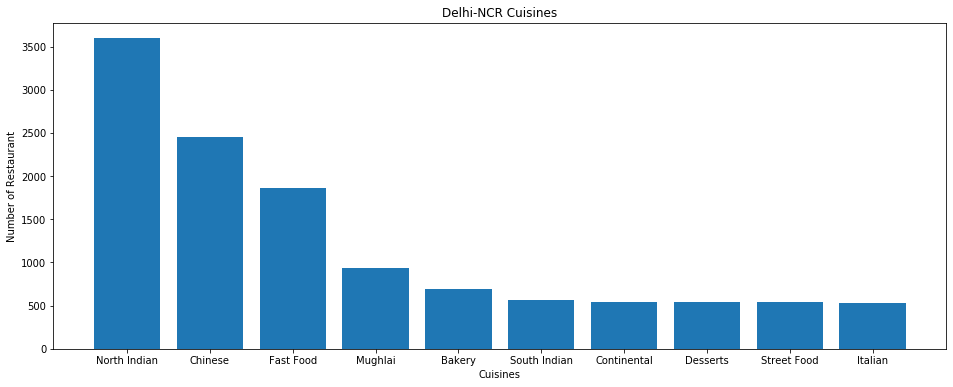

In [15]:
#PLOTTING OF GRAPH    
plt.subplots(figsize=(16,6))
plt.bar(x_rest_india,y_rest_india)
plt.title("Rest of India Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()
plt.subplots(figsize=(16,6))
plt.bar(x_Delhi_ncr,y_Delhi_ncr,)
plt.title("Delhi-NCR Cuisines")
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurant')
plt.show()

Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |        349
Chinese         |        242
Continental     |        177
Italian         |        147
Cafe            |        136
Fast Food       |         97
South Indian    |         62
Mughlai         |         59
Desserts        |         55
Mexican         |         50


TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |       3597
Chinese         |       2448
Fast Food       |       1866
Mughlai         |        933
Bakery          |        697
South Indian    |        569
Continental     |        547
Desserts        |        542
Street Food     |        538
Italian         |        535


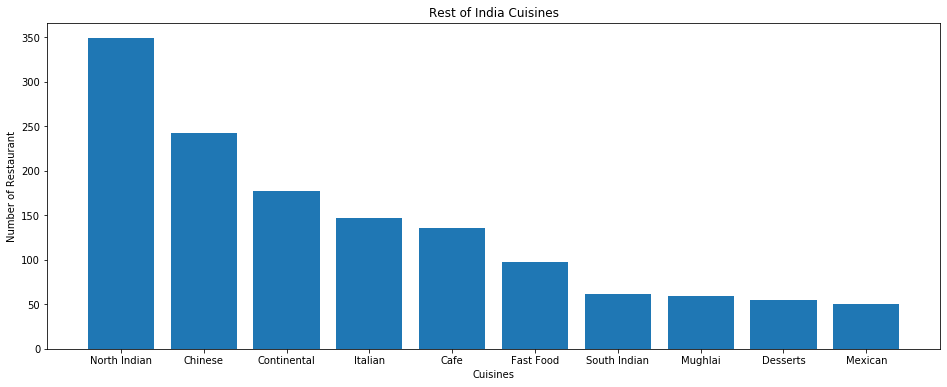

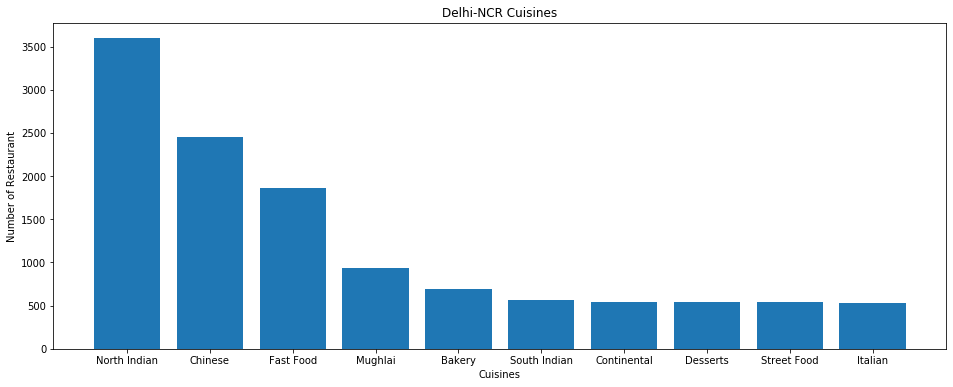

In [17]:

Delhi_top=[]
rest_top=[]
count1=[]
count2=[]

print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p1:
    rest_top.append(ele[0])
    count1.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
print()    
print()    
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p2:
    Delhi_top.append(ele[0])
    count2.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
    
#PLOTTING OF GRAPH    
plt.subplots(figsize=(16,6))
plt.bar(x_rest_india,y_rest_india)
plt.title("Rest of India Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()
plt.subplots(figsize=(16,6))
plt.bar(x_Delhi_ncr,y_Delhi_ncr,)
plt.title("Delhi-NCR Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()